In [2]:
import sys
import cv2 as cv
import matplotlib.pyplot as plt

def main():
    
    window_name = ('Sobel Demo - Simple Edge Detector')
    scale = 1
    delta = 0
    ddepth = cv.CV_16S
    
    
    
    # Load the image
    src = cv.imread("hsLhe.jpg", cv.IMREAD_COLOR)
   
    
    # noise reduction with low-pass filter "Gaussian Filter"
    src = cv.GaussianBlur(src, (3, 3), 0)
    
    #convert to gray-level 
    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    
    
    # Gradient-X
    grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    # Gradient-Y
    grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    
    
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)
    
    #
    grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
#     print(type(grad))
#     print(abs_grad_x)
    
#     output = cv.cvtColor(grad, cv.COLOR_GRAY2BGR)
    cv.imshow("gradient x", abs_grad_x)
    cv.imshow("gradient y", abs_grad_y)
    cv.imshow(window_name,grad)
    cv.waitKey(0)
    
    return "done"

main()

error: OpenCV(4.5.5) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/deriv.cpp:104: error: (-211:One of the arguments' values is out of range) The kernel size must be odd and not larger than 31 in function 'getSobelKernels'


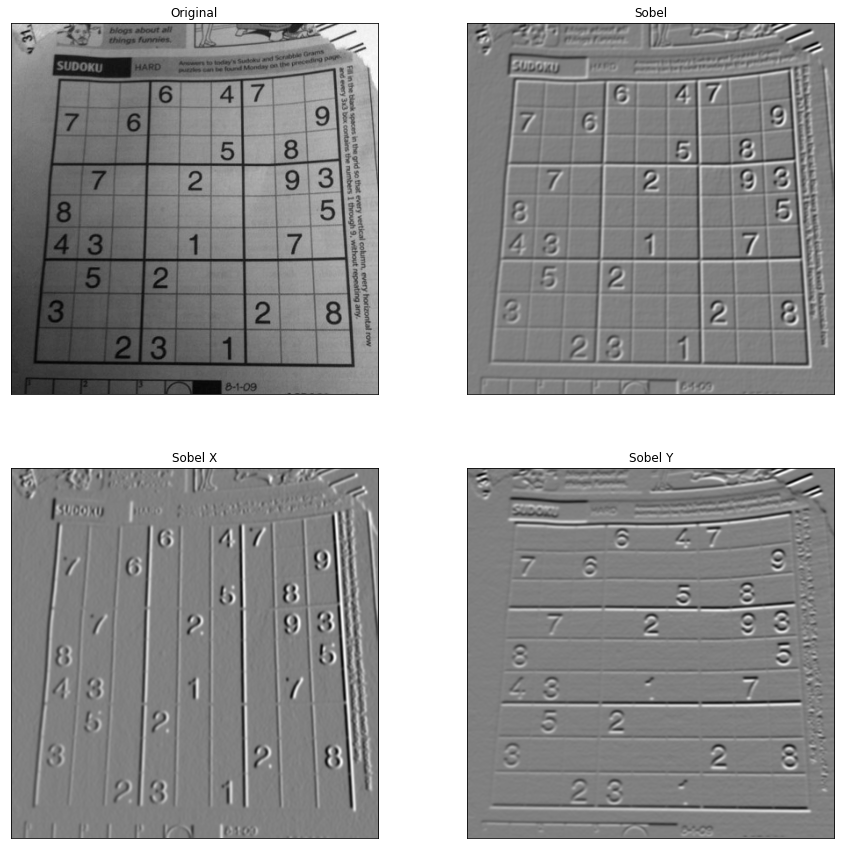

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


img = cv.imread('hsLhe.jpg',0)

sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=7)
# print(sobelx)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=7)
sobel = cv.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

fig, ax = plt.subplots(2,2,figsize=(15,15))

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(sobel,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])


plt.show()

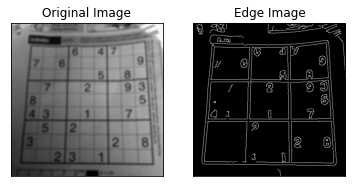

In [116]:
#ref:https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html
import numpy as np
import cv2 
from matplotlib import pyplot as plt
img = cv2.imread('hsLhe.jpg',0)
img = cv2.GaussianBlur(img, (7,7),10)#the more sigma , the higher the blurring , the less the details, the less the edges detected
edges = cv2.Canny(img,10,100)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()